# Linear models for classification

In [1]:
from preamble import *
%matplotlib inline

**Keywords**:
* binary classification: a problem in which we have to chose from 2 posibilities
* decision boundary: the result of the classification model, separates the classes; can be a line, a plane or a hyper plane (multiple features)
* regularization: a method used to reduce over-fitting; it is usually set up by adding a scaled norm of the weight vector; the effect is that the weight vector components will have small values and will have small influences on the classification model
* loss functions: a function used to measure how the model is fitting the training data set
* linear models for classification: logistic regression, linear support vector machines; these apply by default an L2 regularization (same as ridge)

### The forge dataset

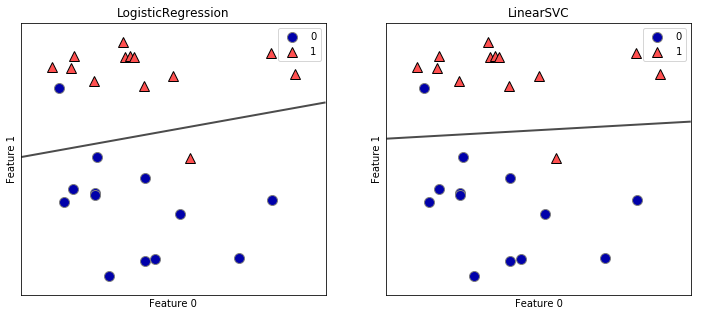

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for model, ax in zip([LogisticRegression(), LinearSVC()], axes):
    clf = model.fit(X, y)
    
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=0.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
    ax.legend()
    ax.set_title("{}".format(clf.__class__.__name__))

For both of these models we have a parameter that controls the strength of the regularization: meaning it can tune the over-fitting. Higher values of C corresponds to less regularization. Next we show the support vector machines decision boundary for three values of C.

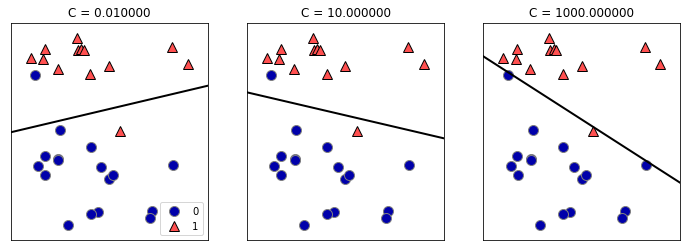

In [3]:
mglearn.plots.plot_linear_svc_regularization()

Even if the tendency would be to think the linear classification is not powerfull enough, as the number of features increases, this model becomes more complex and will render very accurate results; as the complexity grows, it becomes increasingly important to use regularization to avoid overfitting.

### The breast cancer dataset

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


In [5]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [6]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)

print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


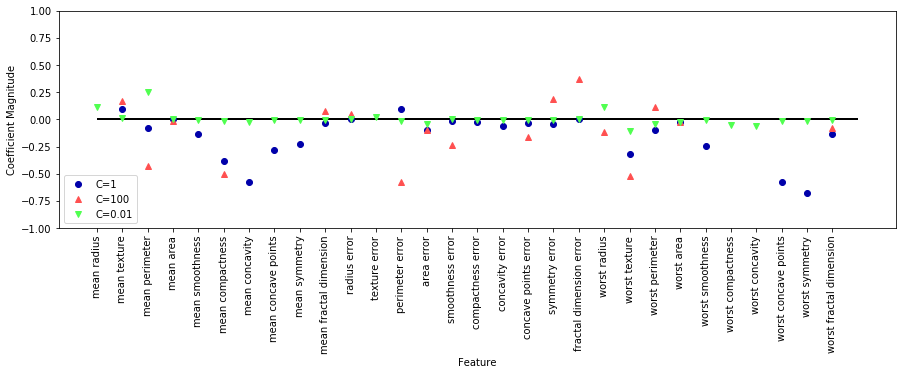

In [7]:
plt.figure(figsize=(15,4))
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label='C=100')
plt.plot(logreg001.coef_.T, 'v', label='C=0.01')

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])

plt.ylim(-1, 1)
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.legend(loc=3)

Because the model uses regularization L2, at low values of C, the coeficients will be close to zero, but never zero; this translates in misleading results for coeficients which should not be taken at face value outside of the model; a better way to acount for these coefficients is by using a L1 regularization which will allow for coef to be zero; in this way some of the features will be ignored if they don't contribute to the model.

C = 0.001
Training set score for L1 logistic regression: 0.913
Test set score for L1 logistic regression: 0.923
C = 1.000
Training set score for L1 logistic regression: 0.960
Test set score for L1 logistic regression: 0.958
C = 100.000
Training set score for L1 logistic regression: 0.986
Test set score for L1 logistic regression: 0.979


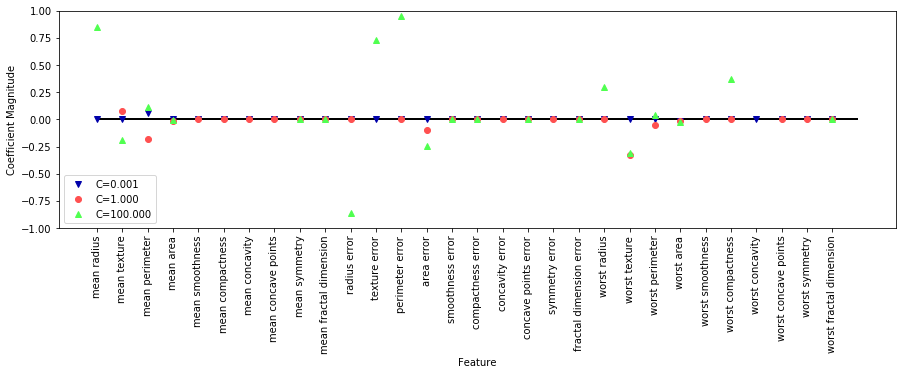

In [8]:
plt.figure(figsize=(15,4))

for C, marker in zip([0.001, 1, 100], ['v', 'o', '^']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    
    print("C = {:.3f}".format(C))
    print("Training set score for L1 logistic regression: {:.3f}".format(lr_l1.score(X_train, y_train)))
    print("Test set score for L1 logistic regression: {:.3f}".format(lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1])
plt.ylim(-1, 1)
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.legend(loc=3)

Using L1 norm most of the weighting components are zero.